In [55]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

import time
from functools import wraps
  
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

%matplotlib inline

# 4.1 最大子数组问题

## 分治法的算法实现

In [86]:
def find_max_crossing_subarray(A, low, high):
    if low == high:
        return (low, high, A[low])
    mid = (low + high) // 2
    left_sum_max, left_sum, left = -float('inf'), 0, 0
    for i in reversed(range(low, mid + 1)):
        left_sum += A[i]
        if left_sum > left_sum_max:
            left, left_sum_max = i, left_sum
    right_sum_max, right_sum, right = -float('inf'), 0, 0
    for i in range(mid+1, high+1):
        right_sum += A[i]
        if right_sum > right_sum_max:
            right, right_sum_max = i, right_sum
    return (left, right, left_sum_max + right_sum_max)


def find_max_subarray_recursion(A, low, high):
    """查找最大子数组的递归解法"""
    if low == high:
        return (low, high, A[low])
    mid = (low + high) // 2
    (left_low, left_high, left_max) = find_max_subarray_recursion(A, low, mid)
    (right_low, right_high, right_max) = find_max_subarray_recursion(A, mid + 1, high)
    (mid_low, mid_high, mid_max) = find_max_crossing_subarray(A, low, high)
    if left_max >= right_max and left_max >= mid_max:
        return (left_low, left_high, left_max)
    if right_max >= left_max and right_max >= mid_max:
        return(right_low, right_high, right_max)
    else:
        return(mid_low, mid_high, mid_max)

In [3]:
    A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
    print("A = " + str(A))
    print("The result of is:" + str(find_max_subarray_recursion(A, 0, len(A) - 1)))
    A = [random.randint(-5, 5) for i in range(10)]
    print("A = " + str(A))
    print("The result is:" + str(find_max_subarray_recursion(A, 0, len(A) - 1)))

A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
The result of is:(7, 10, 43)
A = [-2, 5, 0, 3, 3, -3, -4, -4, -2, 2]
The result is:(1, 4, 11)


## 练习

### 4.1.2 最大子数组问题的暴力解法

In [4]:
def find_max_subarray_brute_force(A):
    """查找最大子数组的暴力解法"""
    max_sum = -float('inf')
    left, right = 0, 0
    for i in range(len(A)):
        temp_sum = 0
        for j in range(i, len(A)):
            temp_sum += A[j]
            if temp_sum > max_sum:
                max_sum = temp_sum
                left, right = i, j
    return (left, right, max_sum)


In [5]:
 A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print("A = " + str(A))
print("The result of is:" + str(find_max_subarray_brute_force(A)))
A = [random.randint(-5, 5) for i in range(10)]
print("A = " + str(A))
print("The result is:" + str(find_max_subarray_brute_force(A)))

A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
The result of is:(7, 10, 43)
A = [-3, 0, -5, 5, 2, 1, 1, 2, 2, 2]
The result is:(3, 9, 15)


### 4.1.3 暴力解法加分治法

#### 暴力解法与分治法运行时间分析

In [108]:
recursive_time = list()
brute_force_time = list()
num = 100
B = [random.randint(-10, 10) for i in range(100)]
for i in range(1, 100):
    A = B[:i]
    recursive_time.append(timeit.timeit(wrapper(find_max_subarray_recursion, A, 0, len(A)-1), number=1000))
    brute_force_time.append(timeit.timeit(wrapper(find_max_subarray_brute_force, A), number=1000))

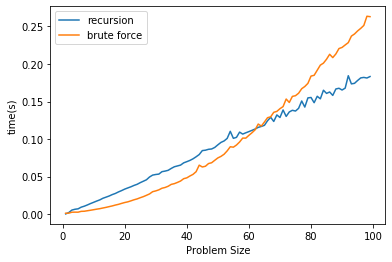

In [109]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(np.arange(1,len(recursive_time) + 1), recursive_time)
line2, =  ax.plot(np.arange(1,len(brute_force_time) + 1), brute_force_time)
ax.set_xlabel('Problem Size')
ax.set_ylabel('time(s)')
ax.legend([line1, line2], ['recursion', 'brute force'])

- 从上图中可看邮，输入规模大概在 70 以下时，暴力解法要优于分治算法
- 输入规模在 20 左右时，暴力解法的性能与分治法差别最大

#### 暴力解法与分治法相结合的算法实现

In [87]:
def find_max_subarray_recursion_and_brute_force(A, low, high, k):
    """查找最大子数组的递归解法"""
    if low == high:
        return (low, high, A[low])
    if high - low > k:
        mid = (low + high) // 2
        (left_low, left_high, left_max) = find_max_subarray_recursion_and_brute_force(A, low, mid, k)
        (right_low, right_high, right_max) = find_max_subarray_recursion_and_brute_force(A, mid + 1, high, k)
        (mid_low, mid_high, mid_max) = find_max_crossing_subarray(A, low, high)
        if left_max >= right_max and left_max >= mid_max:
            return (left_low, left_high, left_max)
        if right_max >= left_max and right_max >= mid_max:
            return(right_low, right_high, right_max)
        else:
            return(mid_low, mid_high, mid_max)
    max_sum = -float('inf')
    left, right = low, low
    for i in range(low, high+1):
        temp_sum = 0
        for j in range(i, high+1):
            temp_sum += A[j]
            if temp_sum > max_sum:
                max_sum = temp_sum
                left, right = i, j
    return (left, right, max_sum)

In [88]:
A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print("A = " + str(A))
print("The result of is:" + str(find_max_subarray_recursion_and_brute_force(A, 0, len(A) - 1, 4)))
A = [random.randint(-5, 5) for i in range(10)]
print("A = " + str(A))
print("The result is:" + str(find_max_subarray_recursion_and_brute_force(A, 0, len(A) - 1, 4)))

A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
The result of is:(7, 10, 43)
A = [-2, -2, 4, -1, -3, 1, -3, -4, -2, 5]
The result is:(9, 9, 5)


#### 输入规模的切换点对性能的影响

In [117]:
A = [random.randint(-10, 10) for i in range(10000)]
res_brute_and_recursion = list()
for k in range(0, 100, 2):
    res_brute_and_recursion.append(timeit.timeit(wrapper(find_max_subarray_recursion_and_brute_force, A, 0, len(A)-1, k), number=100))
recursion_time = timeit.timeit(wrapper(find_max_subarray_recursion, A, 0, len(A)-1), number=100)

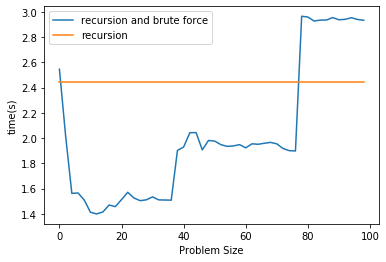

In [119]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(np.arange(0, 100, 2), res_brute_and_recursion)
line2, =  ax.plot(np.arange(0, 100, 2), [recursion_time for i in range(0, 100, 2)])
ax.set_xlabel('Problem Size')
ax.set_ylabel('time(s)')
ax.legend([line1, line2], ['recursion and brute force', 'recursion'])

- 从图中的结果可看出，切换点选在 20 左右时，运行时间最短
- 当切换点在70左右时，算法的性能要低于单纯的分治算法，与暴力算法和分治算法的性能切换点基本相同